In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.left {
    text-align: left;
    float: left;
    width:35%;
    height:90%;
    font-size:0.70em;
} 
.right {
    text-align: right;
    float: right;
    width:65%;
    height:90%;
}
.centerleft {
    text-align: left;
    float: left;
    width:100%;
    height:100%;
}
.centerright {
    text-align: right;
    float: right;
    width:100%;
    height:100%;
}
.centercenter {
    text-align: center;
    vertical-align: center;
    float: center;
    width:100%;
    height:100%;
}
.bottom {
    bottom:0;
    width:100%;
    height:10%;   /* Height of the footer */
}
.rendered_html {
  font-size:1.0em;
}
</style>
""")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
def ax_subplots_set_titles_x_y(axs, titles, xs, ys):
    if axs is None:
        plt.title(titles)
        plt.xlabel(xs)
        plt.ylabel(ys)
        plt.legend() 
    else:
        for i in range(len(axs)):
            axs[i].set_title(titles[i])
            axs[i].set_xlabel(xs[i])
            axs[i].set_ylabel(ys[i])
            axs[i].legend()
            
def plot_distances(x, y, h):
    for i in range(len(x)-1):
        x_ = [x_1[i],x_1[i]]
        y_ = [y[i], h[i]]
        plt.plot(x_, y_, 'green', linestyle=':',linewidth=3)
    plt.plot([x_1[-1],x_1[-1]], [y[-1], h[-1]], 'green', linestyle=':',linewidth=3, label='costs')
    
def create_cost_plt_data(x_, y, hyp, cost_func, interval_w0, interval_w1, num_samples):
    # initilize grid by given arguments and create a meshgrid
    w0 = np.linspace(interval_w0[0], interval_w0[1], num=num_samples)
    w1 = np.linspace(interval_w1[0], interval_w1[1], num=num_samples)
    W0, W1 = np.meshgrid(w0, w1) 
    # initilize cost matrix and cost function
    C = np.zeros([len(w0),len(w1)])
    # calculate cost for each pair of the grid
    for i, w_0 in enumerate(w0):
        for j, w_1 in enumerate(w1):
            y_pred = hyp(w_0, w_1, x_)
            C[j][i] = cost_func(y, y_pred)  
    return W0, W1, C

def create_cost_plt(W0, W1, Costs):
    # contour plot
    fig = plt.figure(figsize=(13,6))
    fig.suptitle('Visualization of MSE Cost Function')
    ax = fig.add_subplot(1, 2, 1)
    ax.contour(W0, W1, C)
    ax.set_xlabel('W 0')
    ax.set_ylabel('W 1')
    # surface plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.plot_surface(T0, T1, C, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)
    ax.set_xlabel('W 0', labelpad=9)
    ax.set_ylabel('W 1', labelpad=9)
    ax.set_zlabel('Costs', labelpad=9)
    fig.colorbar(surf, shrink=0.5)

    

%%HTML
<style>
.CodeMirror {
    width: 100vw;
}
.container {
    width: 90% !important;
}
.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

<div class="centerleft">
    <h1>Basics of Machine Learning - Techniques and Strategies</h1>
    <br>
    <br>
    <br>
    <br>
    <br>
    Klaus Strohmenger - Universitätsmedizin Charité
    <br>
    EMPAIA Academy
    <br>
    September 15, 2021
<div>





<div class="centerleft">
    <h1>Multi-Layer-Perceptron</h1>
    <br>
    <div class="left">
        <ul>
            <li>
                E.g. classify if animal is cat or dog
            </li>
            <li>
                Decision based on <br>$x_1$ (weight) and <br>$x_2$ (ear length)
            </li>
            <li>
                Result $\sigma(z) \in ]0, 1[$
            </li>
            <ul>
                <li>
                    $\sigma(z) \lt 0.5 \rightarrow$ cat
                </li>
                <li>
                    $\sigma(z) \geq 0.5 \rightarrow$ dog
                </li>
            </ul>
            <li>
                Result depends on $w$s
            </li>
            <ul>
                <li>
                   Training NN means <br>adjusting $w$s
                </li>
            </ul>
        </ul>
    </div>
    <div class="right">
        <img src="pics/hidden_layer_2_features_2_neurons_sigmoid_classes.svg" width="100%">
    </div>
</div>





<div class="centerleft">
    <h1>Logistic Regression</h1>
    <br>
    <div class="left">
        <ul>
            <li>
                $\sigma(z_{1,1})$ instead of $\tanh(z_{1,1})$
            </li>
            <li>
                result $\sigma(z)\in]0, 1[$
            </li>
            <li>
                classification
            </li>
        </ul>
    </div>
    <div class="right">
        <img src="pics/hidden_layer_2_features_2_neurons_sigmoid_classes_log_reg_part_highlited.svg" width="100%">
    </div>
</div>

<div class="centerleft">
    <h1>Multivariate Linear Regression</h1>
    <br>
    <div class="left">
        <ul>
            <li>
                $z_{1,1} = w_{0,0,0} + w_{0,1,0} x_1 + w_{0,2,0} x_2$  
            </li>
            <li>
                result $z_{1,1} \in ]-\infty, +\infty[$
            </li>
            <li>
                regression, e.g. predicting house price, based on:
            </li>
            <ul>
                <li>
                    $x_1$ (area in sqm)
                </li>
                <li>
                    $x_2$ (bandwidth in mbit/s)
                </li>
            </ul>
        </ul>
    </div>
    <div class="right">
        <img src="pics/hidden_layer_2_features_2_neurons_sigmoid_classes_multiv_lin_reg_part_highlited.svg">
    </div>
</div>





<div class="centerleft">
    <h1>Univariate Linear Regression</h1>
    <br>
    <div class="left">
        <ul>
            <li>
                $z_{1,1} = w_{0,0,0} + w_{0,1,0} x_1$
            </li>
            <li>
                result $z_{1,1} \in ]-\infty, +\infty[$
            </li>
            <li>
                regression, e.g. predicting house price, based on:
            </li>
            <ul>
                <li>
                    $x_1$ (area in sqm)
                </li>
                <li>
                    <strike>$x_2$ (bandwidth in mbit/s)</strike>
                </li>
            </ul>
        </ul>
    </div>
    <div class="right">
        <img src="pics/hidden_layer_2_features_2_neurons_sigmoid_classes_univ_lin_reg_part_highlited.svg"  width="100%">
    </div>
</div>





<div class="centerleft">
    <h1>Univariate Linear Regression</h1>
    <br>
    <div class="centerleft">
        <ul>
            <li>
                Suppose you inherit a house in Munich
            </li>
            <li>
                Of course you want to stay in Berlin !
            </li>
            <li>
                So you are going to sell / rent it
            </li>
            <li>
                No clue about prices in Munich... what to do ?
            </li>
        </ul>
    </div>
</div>





<div class="centerleft">
    <h1>Univariate Linear Regression</h1>
    <br>
    <div class="centerleft">
        <ul>
            <li>
                Get some (training) data ! 
            </li>
        </ul>
    </div>
</div>





In [37]:
x_1 = np.array([24, 33, 42, 56, 102]) ### sqm
y = np.array([.720, .830, .890, .960, 1.800]) ### price

plt.figure(dpi=100)
plt.scatter(x_1, y, linewidths=10, label='training data')
ax_subplots_set_titles_x_y(None, 'Example house prices', 'sqm', 'price in 1.000 €')

<div class="centerleft">
    <h1>Univariate Linear Regression</h1>
    <br>
    <div class="left" width=60%>
        <ul>
            <li>
                Your house (78 sqm) is not covered by the data :-( 
            </li>
            <li>
                Fit a line ! 
            </li>
        </ul>
    </div>
</div>

In [5]:
x_1 = np.array([24, 33, 42, 56, 102]) ### sqm
y = np.array([0.720, 0.930, 1.100, 1.300, 2.600]) ### price in k €

plt.figure(dpi=90)
plt.scatter(x_1, y, linewidths=10, label='training data')

y_pred = 0.1 + 0.025 * x_1

plt.plot(x_1, y_pred,'red',linewidth=5, label='model w0=0.1, w1=0.025')
ax_subplots_set_titles_x_y(None, 'Example house prices', 'sqm', 'price in 1.000 €') 

<div class="centerleft">
    <h1>Univariate Linear Regression</h1>
    <br>
    <div class="left">
        <ul>
            <li>
                <strong>Hypothesis</strong>: $h(x)=w_0 b + w_1 x$
            </li>
        </ul>
        <img src="pics/univ_lin_regression_graph_line_pic.svg" width="70%">
    </div>
    <div class="right">
        <br>
        <br>
        <img src="pics/hidden_layer_2_features_2_neurons_sigmoid_classes_univ_lin_reg_part_highlited.svg" width="100%">
    </div>
</div>

<div class="centerleft">
    <h1>Univariate Linear Regression</h1>
    <br>
    <ul>
        <li>
                <strong>Hypothesis</strong>: $h(x)=w_0 b + w_1 x$
        </li>
        <li>
            <strong>Cost</strong>: $ mse(h) = \frac{1}{2m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})^2$
        </li>
    </ul>
</div>

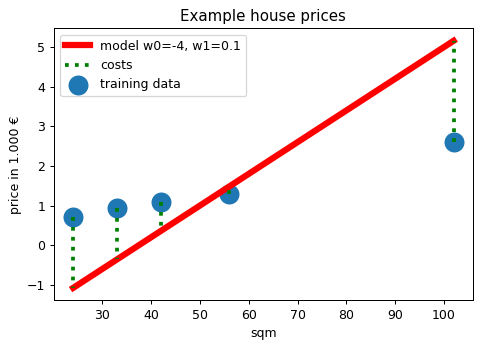

In [39]:
plt.figure(dpi=90)
plt.scatter(x_1, y, linewidths=10, label='training data')
def lin_hypothesis(w0, w1, x): 
    return w0 + w1 * x
y_pred = lin_hypothesis(-3, 0.08, x_1)
plt.plot(x_1, y_pred,'red',linewidth=5, label='model w0=-4, w1=0.1')
plot_distances(x_1, y, y_pred)
ax_subplots_set_titles_x_y(None, 'Example house prices', 'sqm', 'price in 1.000 €')

<div class="centerleft">
    <h1>Univariate Linear Regression</h1>
    <br>
        <ul>
            <li>
                <strong>Hypothesis</strong>:   $h(x) = w_0 b +  w_1 x$
            </li>
            <li>
                <strong>Cost</strong>: $ mse(h) = \frac{1}{2m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})^2$
            </li>
        </ul>
</div>

In [22]:
def mean_squared_error(y, y_pred):
    return 0.5 * np.mean((y - y_pred)**2)

<IPython.core.display.Javascript object>


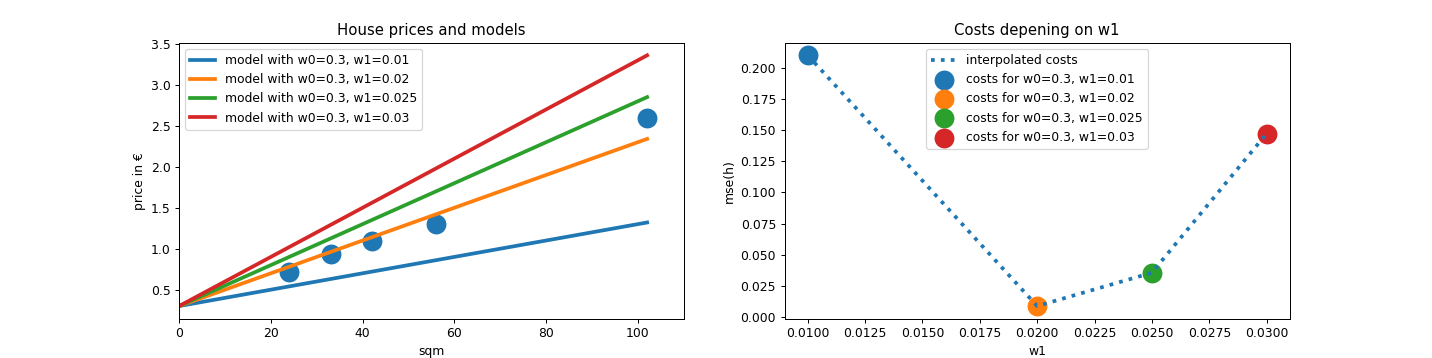

In [23]:
plt.figure(figsize=(16,4), dpi=100)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.scatter(x_1, y, linewidth=10)

costs = []
for w1 in [0.01, 0.02, 0.025, 0.03]:
    y_pred = lin_hypothesis(w0=0.3, w1=w1, x=np.insert(x_1, 0, 0))
    cost = mean_squared_error(y, y_pred[1:])
    costs.append(cost)
    y_p2 =  lin_hypothesis(w0=0.3, w1=w1, x=0)
    ax1.plot(np.insert(x_1, 0, 0), y_pred, linewidth=3, label='model with w0={}, w1={}'.format(0.3, w1))
    ax2.scatter(w1, cost,linewidth=10, label='costs for w0={}, w1={}'.format(0.3, w1))

ax1.set_xlim(0, 110)
ax2.plot([0.01, 0.02, 0.025, 0.03], costs, linewidth=3, linestyle=':', label='interpolated costs')
ax_subplots_set_titles_x_y([ax1, ax2], ['House prices and models', 'Costs depening on w1'], ['sqm', 'w1'], ['price in €', 'mse(h)'])

<div class="centerleft">
    <h1>Univariate Linear Regression</h1>
    <br>
        <ul>
            <li>
                <strong>Hypothesis</strong>:   $h(x) = w_0 b +  w_1 x$
            </li>
            <li>
                <strong>Cost</strong>: $ mse(h) = \frac{1}{2m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})^2$
            </li>
            <li>
                <strong>Partial Derivative (w.r. $w_1$)</strong>: $ \frac{\partial mse(h)}{\partial w_1} = \ldots = \frac{1}{m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$
            </li>
            <li>
                <strong>Partial Derivative (w.r. $w_0$)</strong>: $ \frac{\partial mse(h)}{\partial w_0} = \ldots = \frac{1}{m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})$
            </li>
            <li>
                <strong>Update Rule</strong>: $ w_j^{NEW} := w_j^{OLD} - \alpha \cdot \frac{\partial mse(h)}{\partial w_j}$
            </li>
        </ul>
</div>

<div class="centerleft">
    <h1>Multivariate Linear Regression</h1>
    <br>
    <div class="left" width="100%">
    <ul>
        <li>
            House rent does not depend on sqm (feature $x_1$) alone
        </li>
    </ul>
    </div>
</div>

In [24]:
X = np.random.randn(50,2) * 20 ### 50 examples, 2 features
X[:,0] = X[:,0] - X[:,0].min() + 20 ### no negative sqm!
X[:,1] = X[:,1] - X[:,1].min() + 1 ### no negative mbit/s!
y = 0.3 + 0.02 * X[:,0] + 0.01 * X[:,1] + np.random.randn(50) * 0.05

In [25]:
%matplotlib notebook
plt.figure(dpi=100)
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r')
ax.set_xlabel('$x_1 (sqm)$')
ax.set_ylabel('$x_2 (mbit/s)$')
ax.set_zlabel('$y (price in 1.000€)$')

<IPython.core.display.Javascript object>

Text(0.5, 0, '$y (price in 1.000€)$')

<div class="centerleft">
    <h1>Multivariate Linear Regression</h1>
    <br>
    <div class="left">
        <ul>
            <li>
                <strong>Hypothesis</strong>: $h(x)=w_0 b + w_1 x_1 + w_2 x_2$
            </li>
        </ul>
    <br>
    <br>
    </div>
        <img class="right" src="pics/hidden_layer_2_features_2_neurons_sigmoid_classes_multiv_lin_reg_part_highlited.svg" width="100%">
</div>

<h1>Multivariate Linear Regression</h1>

<strong>Hypothesis</strong>:   $h(x) = w_0 +  w_1 x_1 + w_2 x_2$
 
<strong>Cost</strong>: $ mse(h) = \frac{1}{2m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})^2$

<strong>Partial Derivative (w.r. $w_2$)</strong>: $ \frac{\partial mse(h)}{\partial w_2} = \ldots = \frac{1}{m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)}$

<strong>Partial Derivative (w.r. $w_1$)</strong>: $ \frac{\partial mse(h)}{\partial w_1} = \ldots = \frac{1}{m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)}$

<strong>Partial Derivative (w.r. $w_0$)</strong>: $ \frac{\partial mse(h)}{\partial w_0} = \ldots = \frac{1}{m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})$

<strong>Update Rule</strong>: $ w_j^{NEW} = w_j^{OLD} - \alpha \cdot \frac{\partial mse(h)}{\partial w_j}$
 

In [26]:
### start with random theta values
### ... 1000 epochs later ...
final_w = [0.3, 0.02, 0.01]

<IPython.core.display.Javascript object>


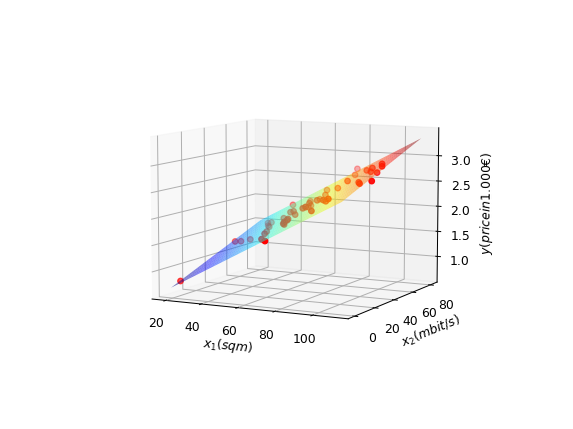

In [27]:
%matplotlib notebook
plt.figure(dpi=100)
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r')
ax.set_xlabel('$x_1 (sqm)$')
ax.set_ylabel('$x_2 (mbit/s)$')
ax.set_zlabel('$y (price in 1.000€)$')

x1_grid = np.linspace(np.min(X[:,0]-1), np.max(X[:,0]+1), 100)
x2_grid = np.linspace(np.min(X[:,1]-1), np.max(X[:,1]+1), 100)
X1, X2 = np.meshgrid(x1_grid, x2_grid)

Y = final_w[0] + final_w[1] * X1 + final_w[2] * X2
ax.plot_surface(X1, X2, Y, cmap=plt.cm.jet, rstride=5, cstride=5, antialiased=True, shade=True, alpha=0.5, linewidth=0. )

<div class="centerleft">
    <h1>Logistic Regression</h1>
    <br>
        <ul>
            <li>
                For classification (opposed to Linear Regression)
            </li>
        </ul>
</div>

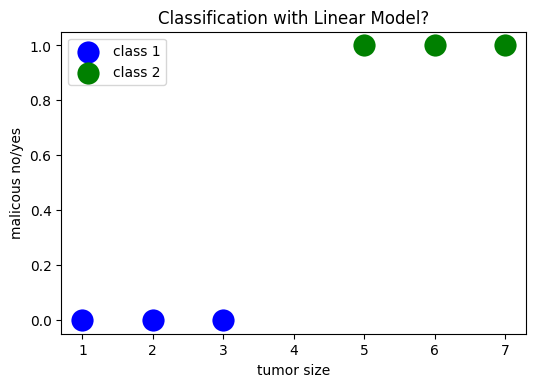

In [28]:
X = np.array([1,2,3,5,6,7])
y = np.array([0,0,0,1,1,1])

%matplotlib inline
plt.figure(dpi=100)
plt.scatter(X[:3],y[:3], color='blue', linewidth=10, label='class 1')
plt.scatter(X[3:],y[3:], color='green', linewidth=10, label='class 2')

ax_subplots_set_titles_x_y(None, 'Classification with Linear Model?', 'tumor size', 'malicous no/yes')

<div class="centerleft">
    <h1>Logistic Regression</h1>
    <br>
        <ul>
            <li>
                Trying Linear Regression ...
            </li>
        </ul>
</div>

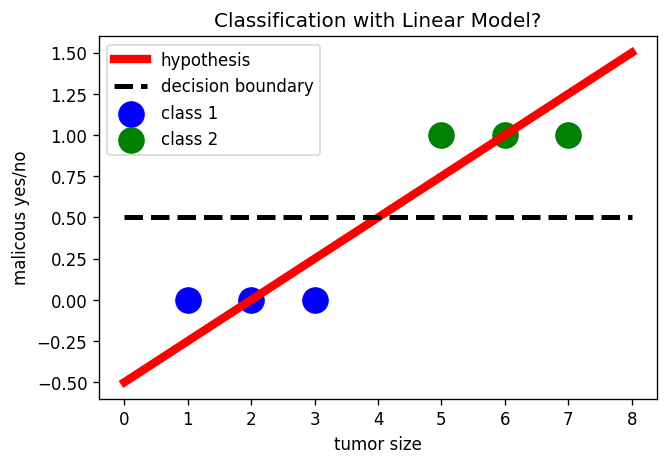

In [29]:
X = np.array([1,2,3,5,6,7])
y = np.array([0,0,0,1,1,1])

plt.figure(dpi=120)
plt.scatter(X[:3],y[:3], color='blue', linewidth=10, label='class 1')
plt.scatter(X[3:],y[3:], color='green', linewidth=10, label='class 2')
plt.plot([0,8], [-.5,1.5], 'r', linewidth=5, label='hypothesis')
plt.plot([0,8], [.5,.5], 'black', linewidth=3, linestyle='--', label='decision boundary')

ax_subplots_set_titles_x_y(None, 'Classification with Linear Model?', 'tumor size', 'malicous yes/no')

<div class="centerleft">
    <h1>Logistic Regression</h1>
    <br>
        <ul>
            <li>
                Still works with more data?
            </li>
        </ul>
</div>

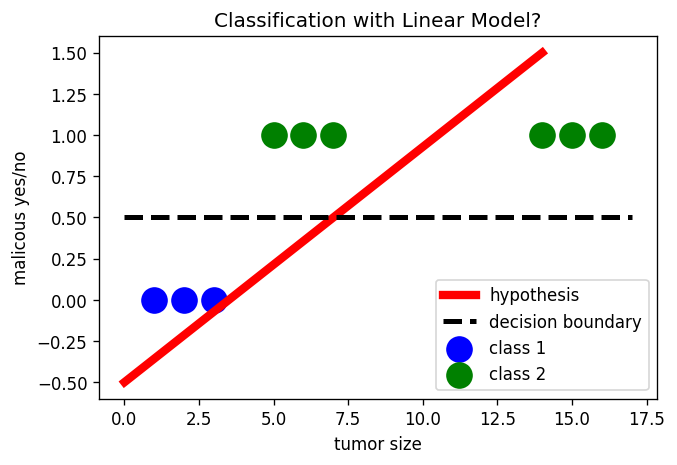

In [30]:
X = np.array([1,2,3,5,6,7,14,15,16])
y = np.array([0,0,0,1,1,1,1,1,1])

plt.figure(dpi=120)
plt.scatter(X[:3],y[:3], color='blue', linewidth=10, label='class 1')
plt.scatter(X[3:],y[3:], color='green', linewidth=10, label='class 2')
plt.plot([0,14], [-.5,1.5], 'r', linewidth=5, label='hypothesis')
plt.plot([0,17], [.5,.5], 'black', linewidth=3, linestyle='--', label='decision boundary')

ax_subplots_set_titles_x_y(None, 'Classification with Linear Model?', 'tumor size', 'malicous yes/no')

<div class="centerleft">
    <h1>Logistic Regression</h1>
    <br>
        <ul>
            <li>
                Introducing non-linear functin $\sigma(z) = \frac{1}{1+exp(-z)}$
            </li>
        </ul>
</div>

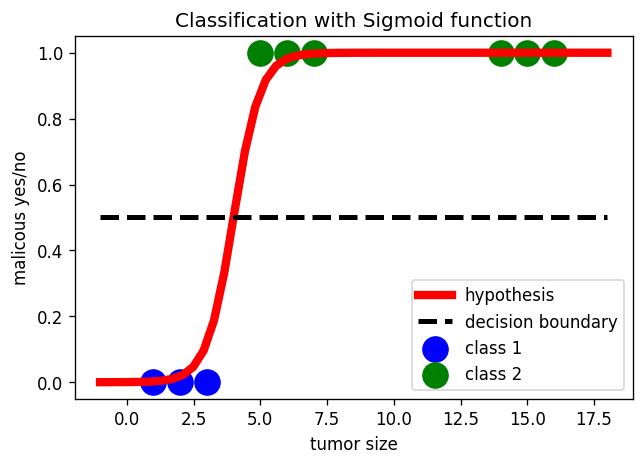

In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x_sigmoid = np.linspace(-1,18,50)
y_sigmoid = sigmoid(-8 + 2 * x_sigmoid)

plt.figure(dpi=120)
plt.scatter(X[:3],y[:3], color='blue', linewidth=10, label='class 1')
plt.scatter(X[3:],y[3:], color='green', linewidth=10, label='class 2')
plt.plot(x_sigmoid, y_sigmoid, 'r', linewidth=5, label='hypothesis')
plt.plot([-1,18], [.5,.5], 'black', linewidth=3, linestyle='--', label='decision boundary')

ax_subplots_set_titles_x_y(None, 'Classification with Sigmoid function', 'tumor size', 'malicous yes/no')

<div class="centerleft">
    <h1>Logistic Regression</h1>
    <br>
    <div class="left">
        <ul>
            <li>
                <strong>Hypothesis</strong>: $h(z)=\sigma(z) = \frac{1}{1+exp(-z)}$
            </li>
            <li>
                with $ z = w_0 b + w_1 x_1 + w_2 x_2$
            </li>
        </ul>
    </div>
    <div class="right" >
<img src="pics/hidden_layer_2_features_2_neurons_sigmoid_classes_log_reg_part_highlited.svg" width="100%">
</div>
</div>

    



In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_hypothesis(x, w):
    return sigmoid(w[0] + w[1:] * x.T)

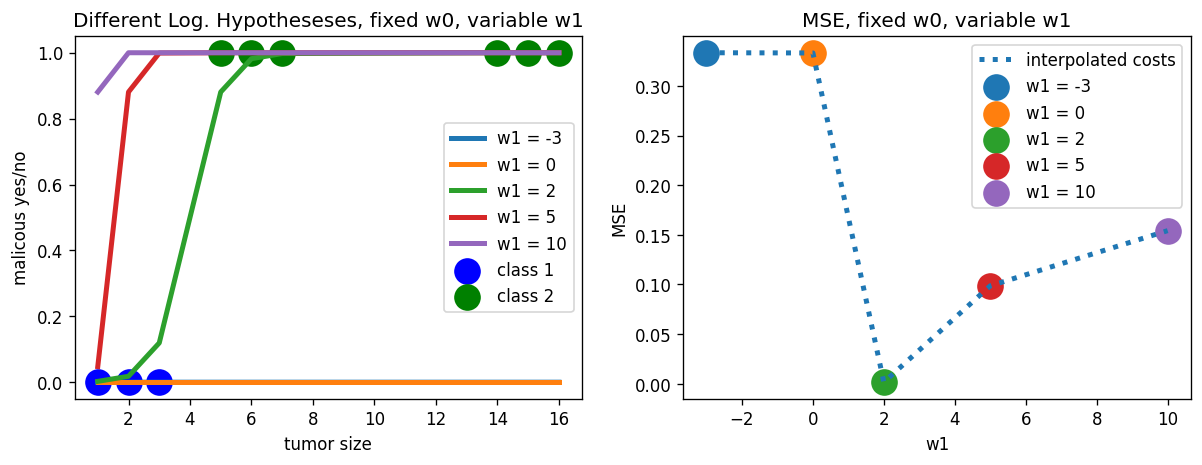

In [33]:
plt.figure(figsize=(12,4), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(X[:3],y[:3], color='blue', linewidth=10, label='class 1')
ax1.scatter(X[3:],y[3:], color='green', linewidth=10, label='class 2')

w1_values = [-3, 0, 2, 5, 10]

costs= []
for w1 in w1_values:
    y_pred = log_hypothesis(X, np.array([-8, w1]))
    ax1.plot(X,y_pred, linewidth=3, label='w1 = {}'.format(w1))
    cost = mean_squared_error(y, y_pred)
    ax2.scatter(w1, cost, linewidths=10, label='w1 = {}'.format(w1))
    costs.append(cost)

ax2.plot(w1_values, costs, linewidth=3, linestyle=':', label='interpolated costs')
    
ax_subplots_set_titles_x_y([ax1,ax2], ['Different Log. Hypotheseses, fixed w0, variable w1','MSE, fixed w0, variable w1'], ['tumor size','w1'],['malicous yes/no', 'MSE'])

<div class="centerleft">
    <h1>Logistic Regression</h1>
    <br>
    <div class="centerleft">
        <ul>
            <li>
                With 2 features ...
            </li>
        </ul>
    </div>
</div>

<IPython.core.display.Javascript object>


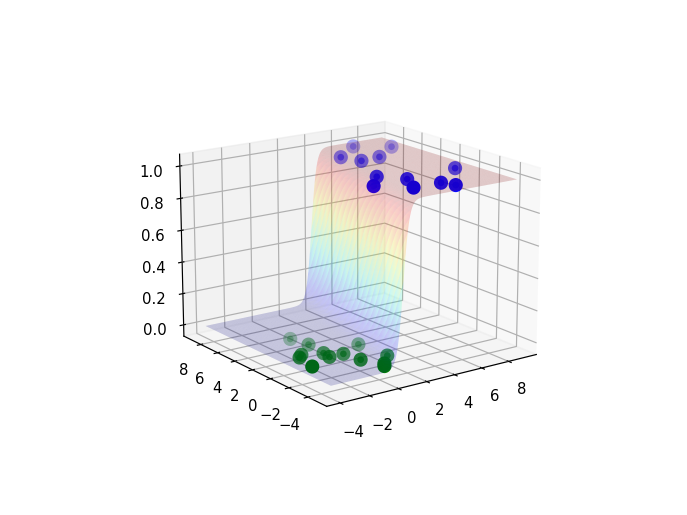

In [34]:
np.random.seed(42)
m = 25
m_2 = m // 2
X = np.random.randn(m,2) * 2
X[:m_2,0] = X[:m_2,0] + 5
X[:5,1] = X[:5,1] + 5

%matplotlib notebook
plt.figure(dpi=120)
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:m_2,0],X[:m_2,1], 1, color='blue', linewidth=5, label='class 1')
ax.scatter(X[m_2:,0],X[m_2:,1], 0, color='green', linewidth=5, label='class 2')

X1, X2 = np.meshgrid(np.linspace(np.min(X[:,0]-1), np.max(X[:,0]+1), 500), np.linspace(np.min(X[:,1]-1), np.max(X[:,1]+1), 500))
Y = sigmoid(-10 + 5 * X1 - 1 * X2)
ax.plot_surface(X1, X2, Y, cmap=plt.cm.jet, rstride=5, cstride=5, antialiased=True, shade=True, alpha=0.2, linewidth=0. )

<div class="centerleft">
    <h1>Multi Layer Perceptron</h1>
    <br>
    <div class="centerleft">
        <ul>
            <li>
                What to do now ?!
            </li>
        </ul>
    </div>
</div>

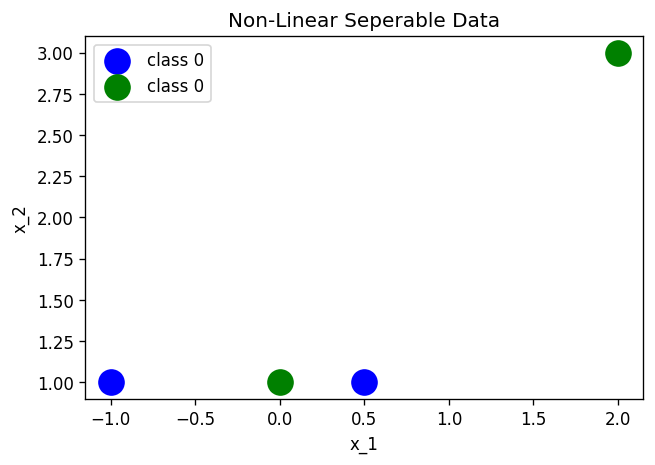

In [35]:
x1 = np.array([-1, +0.5,-0, +2])
x2 = np.array([1, 1, +1, 3])

%matplotlib inline
plt.figure(dpi=120)
plt.scatter(x1[:2],x2[:2], color='blue', linewidth=10, label='class 0')
plt.scatter(x1[2:],x2[2:], color='green', linewidth=10, label='class 0')
ax_subplots_set_titles_x_y(None, 'Non-Linear Seperable Data', 'x_1', 'x_2')

<div class="centerleft">
    <h1>Multi Layer Perceptron</h1>
    <br>
    <div class="centerleft">
        <ul>
            <li>
                What to do now ?!
            </li>
            <li>
                Transform the data !
            </li>
        </ul>
    </div>
</div>

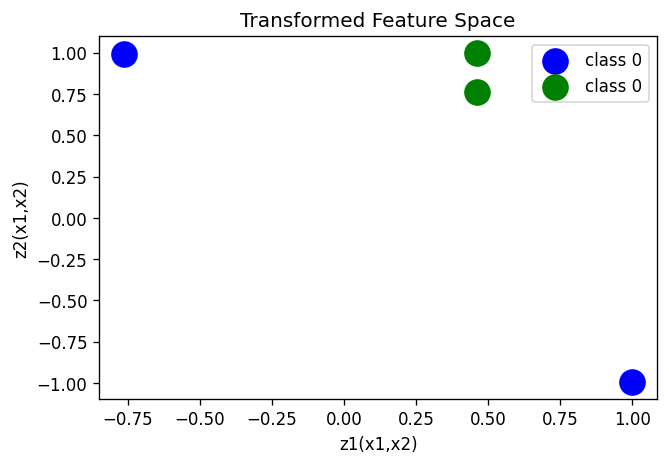

In [36]:
w = [[-2.5, +1.0],
    [-3, +4],
    [+3, +0]]
z1 = w[0][0] + w[1][0]*x1 + w[2][0]*x2
z2 = w[0][1] + w[1][1]*x1 + w[2][1]*x2
z1_tanh = np.tanh( z1 )
z2_tanh = np.tanh( z2 )

plt.figure(dpi=120)
plt.scatter(z1_tanh[:2],z2_tanh[:2], color='blue', linewidth=10, label='class 0')
plt.scatter(z1_tanh[2:],z2_tanh[2:], color='green', linewidth=10, label='class 0')
ax_subplots_set_titles_x_y(None, 'Transformed Feature Space', 'z1(x1,x2)', 'z2(x1,x2)')

<div class="centerleft">
    <h1>Multi Layer Perceptron</h1>
    <br>
    <br>
    <img src="pics/hidden_layer_2_features_2_neurons_sigmoid_classes.svg" width="70%">
</div>

```python
z1 = theta[0][0] + theta[1][0]*x1 + theta[2][0]*x2
z2 = theta[0][1] + theta[1][1]*x1 + theta[2][1]*x2
z1_tanh = np.tanh( z1 )
z2_tanh = np.tanh( z2 )
```

<div class="centerleft">
    <h1>Outlook</h1>
    <br>
    <ul>
        <li>
            Deep Networks
        </li>
    </ul>
    <img src="pics/multi_hidden_layer_binary_classification_last_hidden_2_neurons.svg" width="100%">
</div>

<div class="centerleft">
    <h1>Outlook</h1>
    <br>
    <ul>
        <li>
            Deep Networks
        </li>
        <li>
            Different Layers / Architectures
        </li>
            <ul>
                <li>
                    Convolutional Layers (in contrast to fully connected)
                </li>
                <li>
                    Skip Connections
                </li>
                <li>
                    Many more ...
                </li>
            </ul>
        <li>
            Different Activation Functions (ReLu, etc...) / Cost Function (BCE, etc...)
        </li>
    </ul>
</div>

<div class="centerleft">
Everything is just an addition to our hypothesis function !
</div>


<div class="centerleft">
Basics are still:
    <ul>
        <li>
            Calculating the costs
        </li>
        <li>
            Update $w$s with partial derivates
        </li>
    </ul>
</div>


<div class="centerleft">
    <h1>Thank you</h1>
    <br>
    <h2>Questions...</h2>
</div>